# Modelos de redes neuronales

In [2]:
from sklearn.neural_network import MLPClassifier


In [3]:
import pickle
with open("prestamo.pkl", "rb") as f:
    X_prestamo_entrenamiento, y_prestamo_entrenamiento, X_prestamo_prueba, y_prestamo_prueba = pickle.load(f)

In [4]:
X_prestamo_entrenamiento.shape, y_prestamo_entrenamiento.shape

((2968, 13), (2968,))

In [5]:
X_prestamo_prueba.shape, y_prestamo_prueba.shape

((1273, 13), (1273,))

## Modelo de entrenamiento 

In [37]:
redes_neuronales_prestamo = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=1)
redes_neuronales_prestamo.fit(X_prestamo_entrenamiento,y_prestamo_entrenamiento)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), random_state=1,
              solver='lbfgs')

## Modelo de prueba

In [38]:
prevision = redes_neuronales_prestamo.predict(X_prestamo_prueba)

In [39]:
prevision

array(['Approved', 'Approved', 'Approved', ..., 'Approved', 'Approved',
       'Rejected'], dtype='<U8')

In [40]:
y_prestamo_prueba

array(['Approved', 'Approved', 'Approved', ..., 'Approved', 'Approved',
       'Rejected'], dtype=object)

## Comparar el modelo de prueba con el modelo original
##### 0 - Approved       1 - Rejected

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

### Puntuación de precisión

In [42]:
accuracy_score(prevision,y_prestamo_prueba)

0.9709347996857817

In [43]:
confusion_matrix(prevision,y_prestamo_prueba)

array([[769,  19],
       [ 18, 467]], dtype=int64)

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

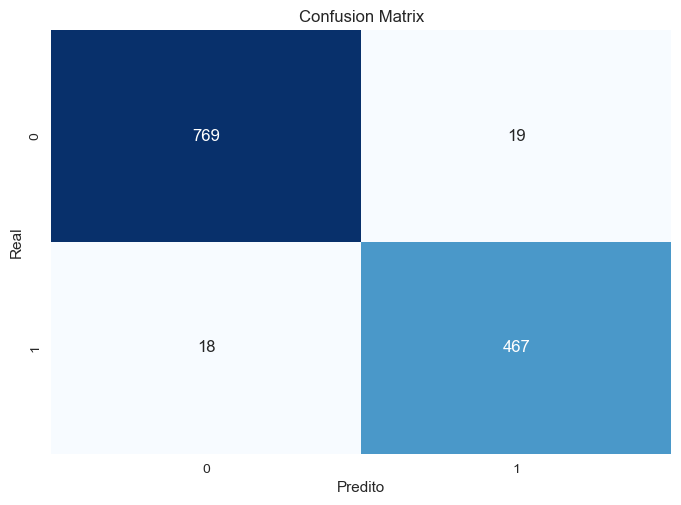

In [45]:
cm = confusion_matrix(prevision,y_prestamo_prueba)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

In [46]:
from yellowbrick.classifier import ConfusionMatrix

0.9709347996857817

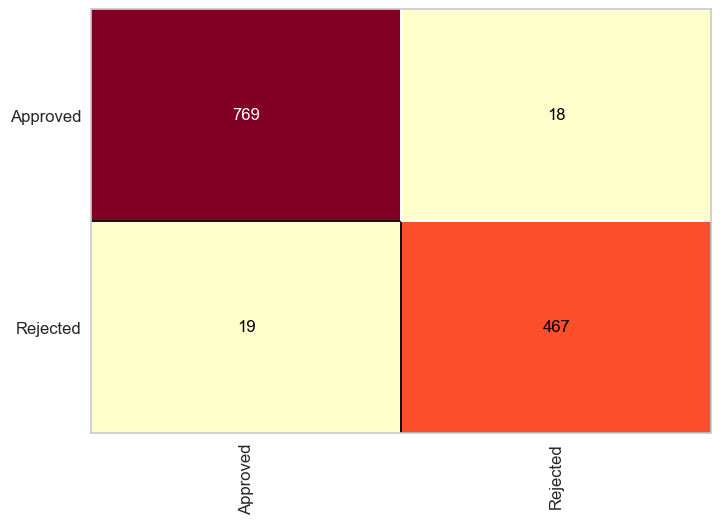

In [47]:
cm = ConfusionMatrix(redes_neuronales_prestamo)
cm.fit(X_prestamo_entrenamiento,y_prestamo_entrenamiento)
cm.score(X_prestamo_prueba,y_prestamo_prueba)

In [18]:
print(classification_report(y_prestamo_prueba,prevision))

              precision    recall  f1-score   support

    Approved       0.97      0.96      0.97       787
    Rejected       0.94      0.96      0.95       486

    accuracy                           0.96      1273
   macro avg       0.96      0.96      0.96      1273
weighted avg       0.96      0.96      0.96      1273

